<a href="https://colab.research.google.com/github/KanzulF/BangkitCapstone2022/blob/Machine-Learning/ModelML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import os 
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.preprocessing import image
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from skimage.io import imread, imsave
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as img

In [10]:
#Import data dari gdrive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [11]:
file_dir = '/content/drive/MyDrive/DATA 5'
train_dir = os.path.join(file_dir, 'train')
valid_dir = os.path.join(file_dir, 'testing')
test_dir = os.path.join(file_dir, 'testing')


In [12]:
#Image data generator untuk dataset 
train_generator = ImageDataGenerator(rescale=1/255,
                                     zoom_range=0.3,
                                     shear_range=0.3,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     rotation_range=60)

train_data = train_generator.flow_from_directory("/content/drive/MyDrive/DATA 5/train",
                                                 target_size=(224,224),
                                                 batch_size=22,
                                                 class_mode="categorical")

Found 440 images belonging to 5 classes.


In [13]:
#Image data generator untuk validasi
validation_generator = ImageDataGenerator(rescale=1/255,
                                          zoom_range=0.3,
                                          shear_range=0.3,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          rotation_range=60)

validation_data = validation_generator.flow_from_directory("/content/drive/MyDrive/DATA 5/testing",
                                                 target_size=(224,224),
                                                 batch_size=19,
                                                 class_mode="categorical")

Found 185 images belonging to 5 classes.


In [14]:
base_model = tf.keras.applications.InceptionResNetV2(input_shape = (224,224,3),
                                               include_top = False,
                                               weights ='imagenet')

In [15]:
base_model.trainable= False

In [16]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')>0.90):
      print("\n sudah mencapai 85% accuracy so cancelling training!")
      self.model.stop_training = True

In [17]:
#Setting Arsitektur CNN
model_image= tf.keras.models.Sequential([ 
base_model,
tf.keras.layers.GlobalAveragePooling2D(),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(5, activation='softmax')
])

In [18]:
from tensorflow.keras.optimizers import SGD
model_image.compile(loss='categorical_crossentropy',
                    optimizer= SGD(learning_rate=0.001, momentum=0.9),
                    metrics=['accuracy'])

In [19]:
filpath = "/content/drive/MyDrive/Modelnew.h5"
model_chekpoint = ModelCheckpoint(filpath,
                                  save_best_only=True,
                                  mode='max',
                                  monitor='val_accuracy')

#Training Model
callbacks = myCallback()
history = model_image.fit(train_data,
                          steps_per_epoch= 20,
                          epochs= 150,
                          validation_data=validation_data,
                          validation_steps = 10,
                          verbose= 2,
                          callbacks=[callbacks, model_chekpoint])

Epoch 1/150
20/20 - 178s - loss: 1.9828 - accuracy: 0.2227 - val_loss: 1.4185 - val_accuracy: 0.3622 - 178s/epoch - 9s/step
Epoch 2/150
20/20 - 16s - loss: 1.4697 - accuracy: 0.3818 - val_loss: 1.3075 - val_accuracy: 0.5297 - 16s/epoch - 781ms/step
Epoch 3/150
20/20 - 15s - loss: 1.2781 - accuracy: 0.5023 - val_loss: 1.2771 - val_accuracy: 0.5351 - 15s/epoch - 775ms/step
Epoch 4/150
20/20 - 13s - loss: 1.2144 - accuracy: 0.5068 - val_loss: 1.2724 - val_accuracy: 0.5081 - 13s/epoch - 640ms/step
Epoch 5/150
20/20 - 12s - loss: 1.1912 - accuracy: 0.5295 - val_loss: 1.2202 - val_accuracy: 0.5135 - 12s/epoch - 609ms/step
Epoch 6/150
20/20 - 12s - loss: 1.1764 - accuracy: 0.5295 - val_loss: 1.2294 - val_accuracy: 0.5351 - 12s/epoch - 614ms/step
Epoch 7/150
20/20 - 15s - loss: 1.1160 - accuracy: 0.5727 - val_loss: 1.1649 - val_accuracy: 0.5514 - 15s/epoch - 755ms/step
Epoch 8/150
20/20 - 14s - loss: 1.0876 - accuracy: 0.5750 - val_loss: 1.1999 - val_accuracy: 0.5568 - 14s/epoch - 724ms/step
E

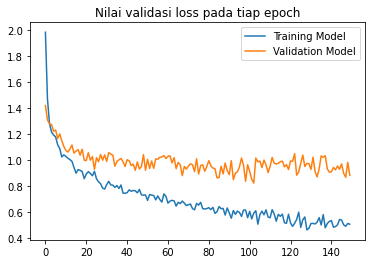

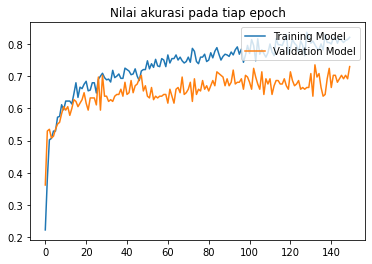

In [20]:
#Plot Training

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Model', 'Validation Model'], loc='upper right')
plt.title('Nilai validasi loss pada tiap epoch')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Model', 'Validation Model'], loc='upper right')
plt.title('Nilai akurasi pada tiap epoch')
plt.show()

### **Testing Model Prediction**


In [34]:
model = load_model("/content/drive/MyDrive/Modelnew.h5")

In [35]:
labels = train_data.class_indices
labels = dict((v,k) for k,v in labels.items())

print(labels)

{0: 'Acne', 1: 'Actinic Keratosis', 2: 'Basal Cell Carcinoma', 3: 'Eczema', 4: 'Rosacea'}


Saving rosacea-45.jpg to rosacea-45.jpg
rosacea-45.jpg
Penyakit ini termasuk class: Rosacea


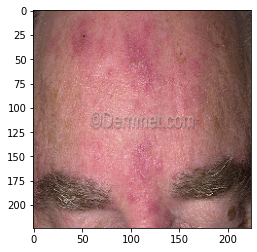

In [38]:
#Testing
from keras.preprocessing import image
from google.colab import files

uploade = files.upload()

for ft in uploade.keys():

  pathtest = ft
  img = image.load_img(pathtest, target_size= (224, 224))
  imagplot = plt.imshow(img)
  xtest = image.img_to_array(img)
  xtest = np.expand_dims(xtest, axis=0)

  file_image = np.vstack([xtest])
  prediction_class = model_image.predict(file_image, batch_size=10)
  print(ft)

  output = prediction_class[0].argmax()
  print("Penyakit ini termasuk class:",labels[output])

  break



Saving basal-cell-carcinoma-lid-6.jpg to basal-cell-carcinoma-lid-6 (2).jpg
basal-cell-carcinoma-lid-6.jpg
Penyakit ini termasuk class: Basal Cell Carcinoma


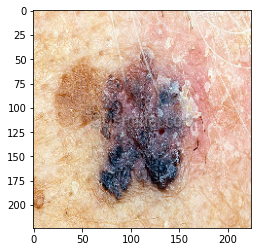

In [ ]:
#Testing
from keras.preprocessing import image
from google.colab import files
uploade = files.upload()

for ft in uploade.keys():

  pathtest = ft
  img = image.load_img(pathtest, target_size= (224, 224, 3))
  imagplot = plt.imshow(img)
  xtest = image.img_to_array(img)
  xtest = np.expand_dims(xtest, axis=0)

  file_image = np.vstack([xtest])
  prediction_class = model_image.predict(file_image, batch_size=100)
  print(ft)

  label_class = os.listdir(train_dir)

  for i in range(100):
    if prediction_class[0][i] == 0 :
      print('Penyakit ini termasuk class:',label_class[i])
    elif prediction_class[0][i] == 1 :
      print('Penyakit ini termasuk class:',label_class[i-1])
    elif prediction_class[0][i] == 1 :
      print('Penyakit ini termasuk class:',label_class[i])
    else :
      print('Penyakit ini termasuk class:',label_class[i-3])

      break
      


In [ ]:
model = load_model('/content/drive/MyDrive/Modelnew.h5')

Saving eczem49.jpg to eczem49.jpg
The image is classified as [0. 0. 0. 0. 1.]
['Acne', 'Actinic Keratosis', 'Basal Cell Carcinoma', 'Eczema', 'Rosacea']
Prediction for the image below: Rosacea


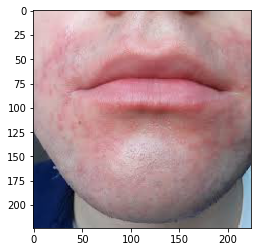

In [33]:
import keras
from keras_preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
 
  # Predicting Images
  path = fn
  img = keras.preprocessing.image.load_img(path, target_size=(224, 224,3))
  x = keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=1)
  images = np.vstack([x])
  plt.imshow(img)
  img = np.expand_dims(img, axis = 0)
  predictions = model.predict(img)
  print("The image is classified as", predictions[0])
  class_names = sorted(os.listdir('/content/drive/MyDrive/DATA 5/train'))
  print(class_names)
  predicted_class = class_names[np.argmax(predictions[0])]
  print("Prediction for the image below:", predicted_class)